In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
athletes = pd.read_csv('/content/athletes.csv')
events = pd.read_csv('/content/events.csv')
medalists = pd.read_csv('/content/medallists.csv')
medals = pd.read_csv('/content/medals.csv')
total_medals = pd.read_csv('/content/medals_total.csv')
torch_route = pd.read_csv('/content/torch_route.csv')
venues = pd.read_csv('/content/venues.csv')

In [3]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11113 non-null  int64  
 1   current             11113 non-null  bool   
 2   name                11113 non-null  object 
 3   name_short          11110 non-null  object 
 4   name_tv             11110 non-null  object 
 5   gender              11113 non-null  object 
 6   function            11113 non-null  object 
 7   country_code        11113 non-null  object 
 8   country             11113 non-null  object 
 9   country_long        11113 non-null  object 
 10  nationality         11110 non-null  object 
 11  nationality_long    11110 non-null  object 
 12  nationality_code    11110 non-null  object 
 13  height              11110 non-null  float64
 14  weight              11108 non-null  float64
 15  disciplines         11113 non-null  object 
 16  even

In [4]:
selected_columns = ['name', 'gender', 'country', 'height', 'disciplines', 'events', 'birth_date', 'birth_country']

athletes_cleaned = athletes[selected_columns]

In [5]:
athletes_cleaned

,name,gender,country,height,disciplines,events,birth_date,birth_country
0,ALEKSANYAN Artur,Male,Armenia,0.0,['Wrestling'],"[""Men's Greco-Roman 97kg""]",1991-10-21,Armenia
1,AMOYAN Malkhas,Male,Armenia,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1999-01-22,Armenia
2,GALSTYAN Slavik,Male,Armenia,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21,NaN
3,HARUTYUNYAN Arsen,Male,Armenia,0.0,['Wrestling'],"[""Men's Freestyle 57kg""]",1999-11-22,Armenia
4,TEVANYAN Vazgen,Male,Armenia,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1999-10-27,Armenia
...,...,...,...,...,...,...,...,...
11108,ADA ETO Sefora,Female,Equatorial Guinea,165.0,['Athletics'],"[""Women's 100m""]",2003-06-11,Equatorial Guinea
11109,LIUZZI Emanuela,Female,Italy,0.0,['Wrestling'],"[""Women's Freestyle 50kg""]",2000-04-27,NaN
11110,BOERS Isayah,Male,Netherlands,NaN,[Athletics],[4 x 400m Relay Mixed],1999-06-19,NaN
11111,STAUT Kevin,Male,France,NaN,[Equestrian],[Jumping Team],1980-11-15,NaN


In [8]:
#Calculating age of each athletes
athletes_cleaned.loc[:,'age'] = (pd.to_datetime('today') - pd.to_datetime(athletes_cleaned['birth_date'])).dt.days // 365


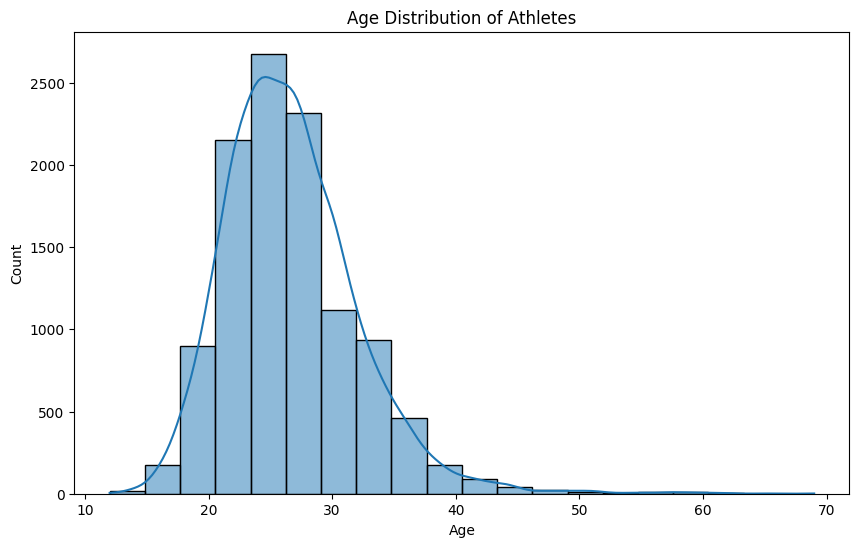

In [9]:
#Plotting figure showcasing the age distribution among athlestes
plt.figure(figsize=(10, 6))
sns.histplot(data=athletes_cleaned, x='age', bins=20, kde=True)
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [10]:
#Checking each gender count
athletes_cleaned['gender'].value_counts()

,count
gender,
Male,5658
Female,5455


In [11]:
gender_cnt = athletes_cleaned['gender'].value_counts()

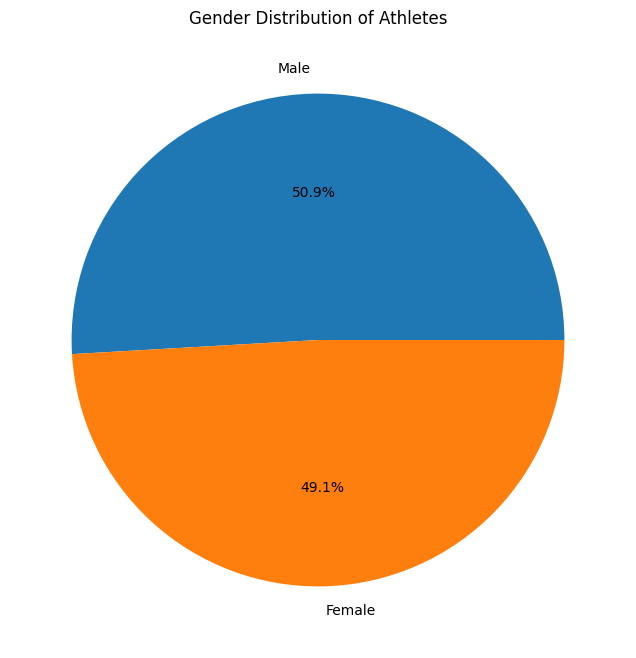

In [12]:
#Plotting figure for gender distribution among athletes
plt.figure(figsize=(8, 8))
athletes_cleaned['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Athletes')
plt.ylabel('')
plt.show()

In [13]:
# Removing "[]'" from disciplines data
athletes_cleaned.loc[:,'disciplines'] = athletes_cleaned['disciplines'].apply(lambda x: str(x).strip("[]'"))

# Group the data by Discipline and Gender, and count the athletes
gender_sport_dist = athletes_cleaned.groupby(['disciplines', 'gender']).size().unstack(fill_value=0)

# Calculate the total number of athletes per sport and sort in descending order
gender_sport_dist.loc[:, 'Total'] = gender_sport_dist.sum(axis=1)

# Sort the DataFrame by total number of athletes (descending)
gender_sport_dist = gender_sport_dist.sort_values(by='Total', ascending=False)

# Drop the column Total as we only need it to sort the result
gender_sport_dist = gender_sport_dist.drop(columns='Total')

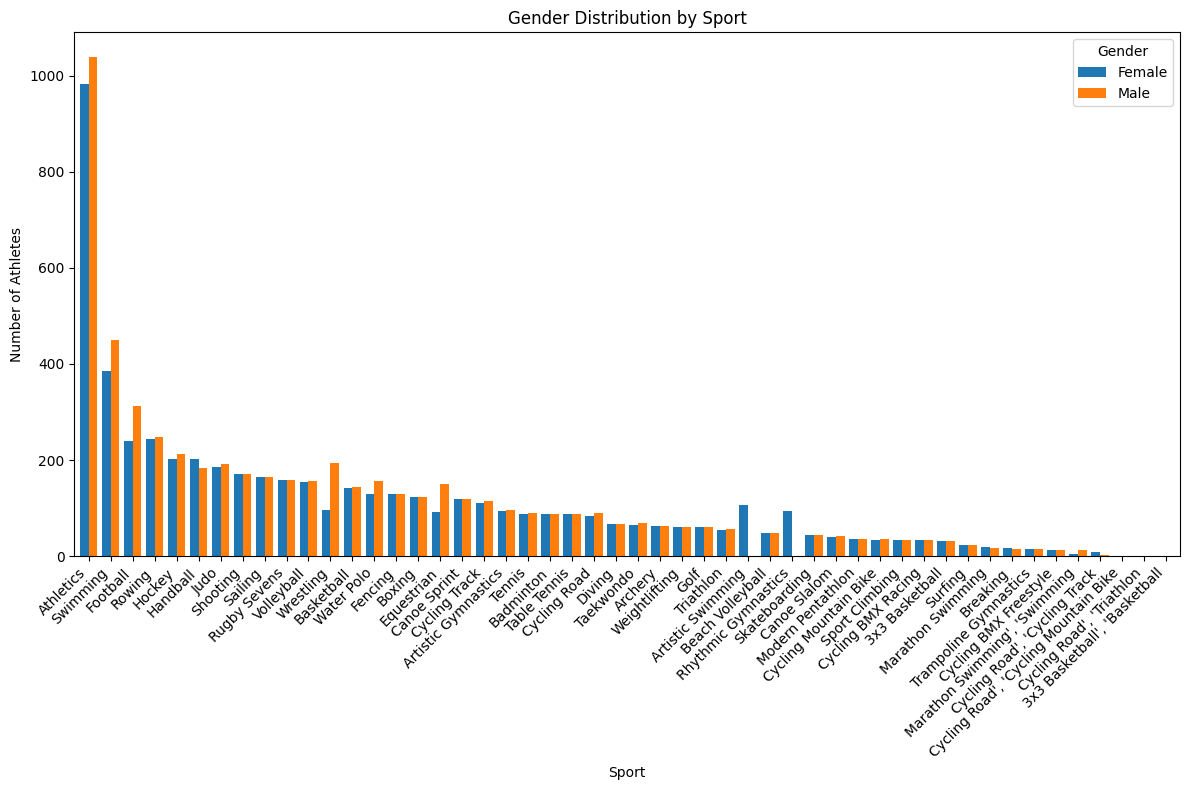

In [14]:
# Plotting the gender distribution by sport as side-by-side bars
gender_sport_dist.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Gender Distribution by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [15]:
# Athlete Representation by Country using map
import plotly.graph_objects as go

athletes_by_country = athletes_cleaned.groupby(['birth_country']).size()
athletes_by_country = athletes_by_country.reset_index(name='Total_Athletes')
fig = go.Figure(data=go.Choropleth(
    locations=athletes_by_country['birth_country'],
    locationmode='country names',
    z=athletes_by_country['Total_Athletes'],
    colorscale='Blues',
    colorbar_title="Number of Athletes",
))

fig.update_layout(
    title_text='Athlete Representation by Country',
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular')
)

fig.show()


In [16]:
# Athlete Representation by Country using bar
# Sort the count in descending order
athletes_by_country = athletes_by_country.sort_values(by='Total_Athletes', ascending=False)

# Considering only top 50 countries
athletes_by_country = athletes_by_country.iloc[:50]

# Plotting the bar chart with seaborn
fig = px.bar(athletes_by_country,
             x='birth_country', y='Total_Athletes',
             title='Number of Olympic Athletes by Country',
             color='Total_Athletes',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Country', yaxis_title='Total Number of Athletes', xaxis_tickangle=-75)
fig.show()

In [17]:
#Medal Count by Country
top_total_medals = total_medals.sort_values('Total', ascending=False).head(10)

#Plotting Stacked bar chart demonstrating Gold, Silver, Bronze Medals distribution
fig = px.bar(top_total_medals, x='country', y=['Bronze Medal', 'Silver Medal', 'Gold Medal'], color_discrete_map={
                                  'Gold Medal': '#FFDA76',
                                  'Silver Medal': '#C0C0C0',
                                  'Bronze Medal': '#D0B8A8'
                                  })
fig.update_layout(title='Medal Counts by Country', xaxis_title='Country', yaxis_title='Number of Medals')
fig.show()

In [18]:
# Total Medals by County
total_medals = total_medals.sort_values('Total', ascending=False)
total_medals

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,United States,United States of America,40,44,42,126
1,CHN,China,People's Republic of China,40,27,24,91
6,GBR,Great Britain,Great Britain,14,22,29,65
4,FRA,France,France,16,26,22,64
3,AUS,Australia,Australia,18,19,16,53
...,...,...,...,...,...,...,...
77,MGL,Mongolia,Mongolia,0,1,0,1
76,JOR,Jordan,Jordan,0,1,0,1
75,FIJ,Fiji,Fiji,0,1,0,1
74,CYP,Cyprus,Cyprus,0,1,0,1


In [19]:
# Rename column names for preparing them to merge
athletes_by_country = athletes_by_country.rename(columns={'birth_country': 'country'})
total_medals = total_medals.rename(columns={'Total': 'Total_Medal'})

# Merge df1 with df2 on the 'birth_country' column
total_athelete_medals = athletes_by_country.merge(total_medals[['country', 'Total_Medal']], on='country', how='left')

# Replace NaN with 0
total_athelete_medals = total_athelete_medals.fillna(0)

In [20]:
#Plotting Scattered graph demonstrating correaltion between no. of athletes and no. of medals
fig = px.scatter(total_athelete_medals, x='Total_Athletes', y='Total_Medal', hover_name='country',
                 title='Number of Athletes vs Number of Medals')
fig.update_xaxes(title_text='Number of athletes')
fig.update_yaxes(title_text='Number of medals')
fig.show()

In [21]:
#Total Events by Sport
events.groupby('sport').size().sort_values(ascending=False).head(10)

,0
sport,
Athletics,48
Swimming,35
Wrestling,18
Shooting,15
Judo,15
Rowing,14
Artistic Gymnastics,14
Boxing,13
Fencing,12


In [22]:
# Group the data and get the size for each sport
sport_counts = events.groupby('sport').size().sort_values(ascending=False)

# Convert the groupby result to a DataFrame for seaborn
sport_counts_df = sport_counts.reset_index()
sport_counts_df.columns = ['Sport', 'Count']

# Plotting the bar chart with seaborn
fig = px.bar(sport_counts_df,
             x='Sport', y='Count',
             title='Number of Events by Sport',
             color='Count',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Sport',
                  yaxis_title='Number of Events',
                  xaxis_tickangle=-75)  # Rotate labels by -45 degrees
fig.show()